In [17]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [18]:
df = pd.read_csv("creditcard.csv")

In [19]:
X = df.drop(columns=['Class'])
y = df['Class']

In [20]:
#Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
# Undersampling
rus = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = rus.fit_resample(X, y)

In [22]:
# Oversampling
ros = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = ros.fit_resample(X, y)

In [23]:
# SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)


In [24]:
# Function to evaluate model
def evaluate_model(model, X, y):
    print("Splitting Datasets....")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Successfully split!!!")
    
    print("Model Fitting.....")
    model.fit(X_train, y_train)
    print("Successfully model fitted!!!")

    print("------------Training Prediction--------------")
    y_train_preds = model.predict(X_train)
    print(f"Classification Report:\n\n{classification_report(y_train, y_train_preds)}\n\n")

    cf_matrix = confusion_matrix(y_train, y_train_preds)
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix - Training", color="orange", fontsize=16)
    ax.set(xlabel="Predicted Label", ylabel="Actual Label")
    plt.show()

    train_accuracy = accuracy_score(y_train, y_train_preds) * 100
    train_f1 = f1_score(y_train, y_train_preds, average='weighted') * 100
    print(f"Accuracy Score:\n\n{train_accuracy:.2f}%\n")
    print(f"F1 Score:\n\n{train_f1:.2f}%\n")

    print("------------Test Prediction--------------")
    y_test_preds = model.predict(X_test)
    print(f"Classification Report:\n\n{classification_report(y_test, y_test_preds)}\n\n")

    cf_matrix = confusion_matrix(y_test, y_test_preds)
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
    fig.suptitle(t="Confusion Matrix - Test", color="orange", fontsize=16)
    ax.set(xlabel="Predicted Label", ylabel="Actual Label")
    plt.show()

    test_accuracy = accuracy_score(y_test, y_test_preds) * 100
    test_f1 = f1_score(y_test, y_test_preds, average='weighted') * 100
    print(f"Accuracy Score:\n\n{test_accuracy:.2f}%\n")
    print(f"F1 Score:\n\n{test_f1:.2f}%\n")

    return train_accuracy, train_f1, test_accuracy, test_f1


In [25]:
# Function to apply and evaluate all models
def apply_all_models(X, y):
    models = {
        "KNeighbors": KNeighborsClassifier(),
        "XGBoost": XGBClassifier(),
        "DecisionTree": DecisionTreeClassifier(),
        "RandomForest": RandomForestClassifier(),
        "LogisticRegression": LogisticRegression(max_iter=5000),
        "NaiveBayes": GaussianNB()
    }
    results = {}
    for name, model in models.items():
        print(f"Evaluating {name} on Normal Dataset:")
        results[name] = evaluate_model(model, X, y)
        print("\n\n")

    return results

Applying and evaluating models on Normal Dataset
Evaluating KNeighbors on Normal Dataset:
Splitting Datasets....
Successfully split!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.98      0.11      0.19       394

    accuracy                           1.00    227845
   macro avg       0.99      0.55      0.60    227845
weighted avg       1.00      1.00      1.00    227845





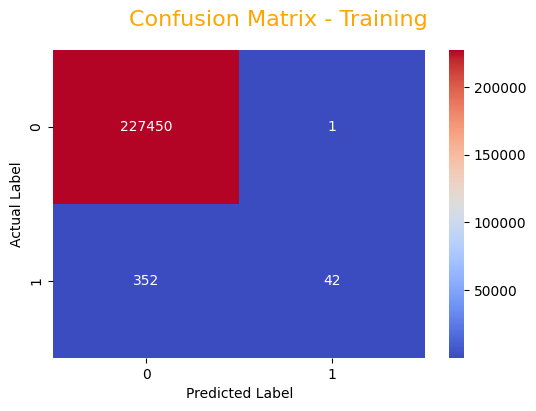

Accuracy Score:

99.85%

F1 Score:

99.78%

------------Test Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       1.00      0.05      0.10        98

    accuracy                           1.00     56962
   macro avg       1.00      0.53      0.55     56962
weighted avg       1.00      1.00      1.00     56962





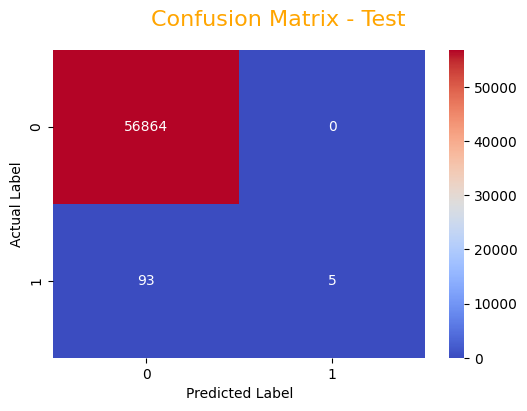

Accuracy Score:

99.84%

F1 Score:

99.76%




Evaluating XGBoost on Normal Dataset:
Splitting Datasets....
Successfully split!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845





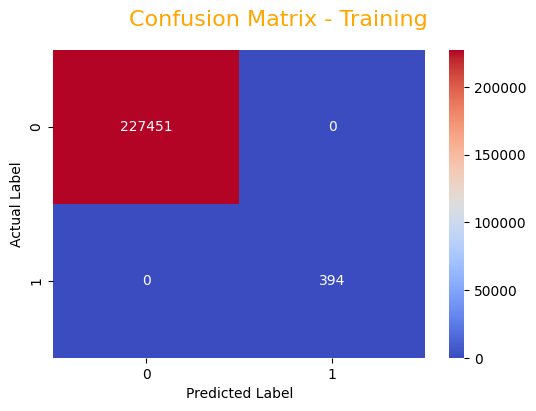

Accuracy Score:

100.00%

F1 Score:

100.00%

------------Test Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962





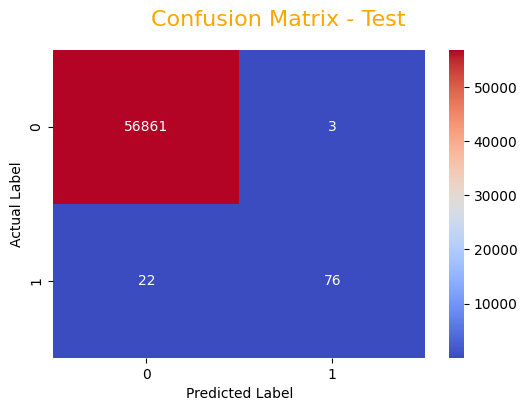

Accuracy Score:

99.96%

F1 Score:

99.95%




Evaluating DecisionTree on Normal Dataset:
Splitting Datasets....
Successfully split!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845





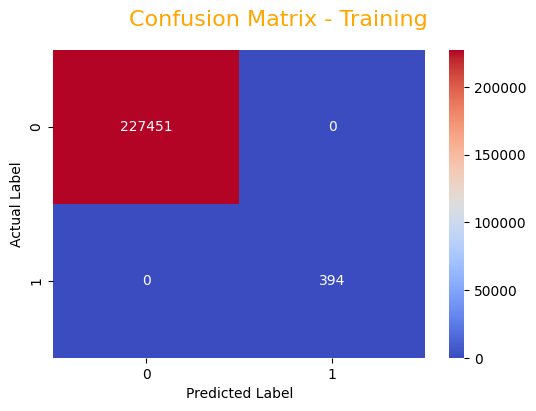

Accuracy Score:

100.00%

F1 Score:

100.00%

------------Test Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.85      0.79        98

    accuracy                           1.00     56962
   macro avg       0.87      0.92      0.90     56962
weighted avg       1.00      1.00      1.00     56962





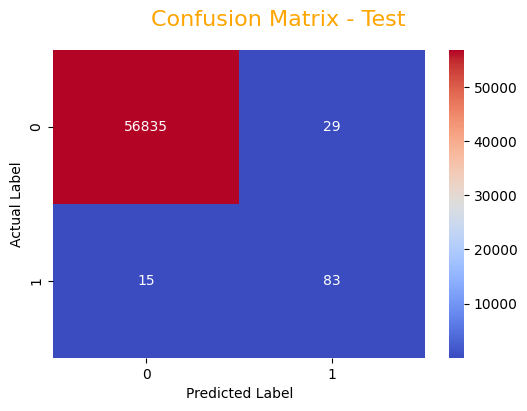

Accuracy Score:

99.92%

F1 Score:

99.93%




Evaluating RandomForest on Normal Dataset:
Splitting Datasets....
Successfully split!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845





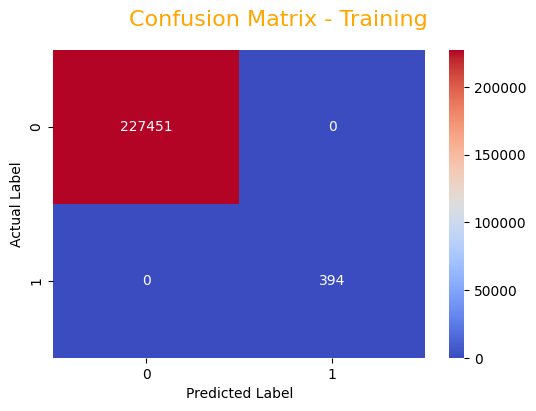

Accuracy Score:

100.00%

F1 Score:

100.00%

------------Test Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.79      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962





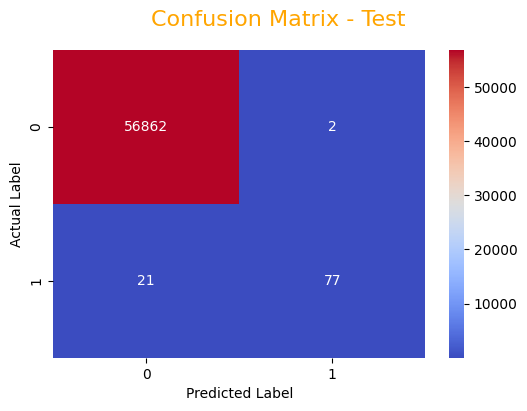

Accuracy Score:

99.96%

F1 Score:

99.96%




Evaluating LogisticRegression on Normal Dataset:
Splitting Datasets....
Successfully split!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.89      0.62      0.73       394

    accuracy                           1.00    227845
   macro avg       0.95      0.81      0.87    227845
weighted avg       1.00      1.00      1.00    227845





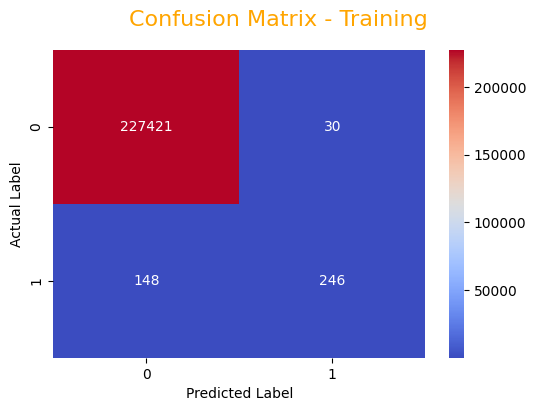

Accuracy Score:

99.92%

F1 Score:

99.92%

------------Test Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962





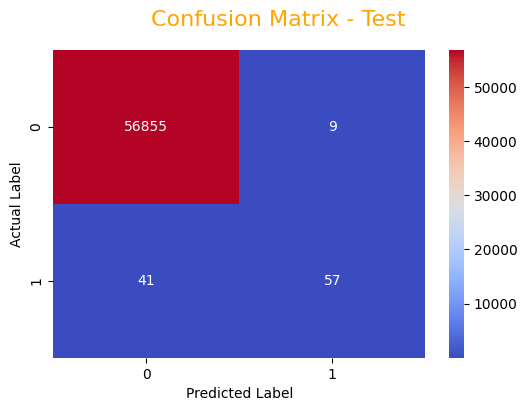

Accuracy Score:

99.91%

F1 Score:

99.90%




Evaluating NaiveBayes on Normal Dataset:
Splitting Datasets....
Successfully split!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    227451
           1       0.16      0.66      0.26       394

    accuracy                           0.99    227845
   macro avg       0.58      0.83      0.63    227845
weighted avg       1.00      0.99      1.00    227845





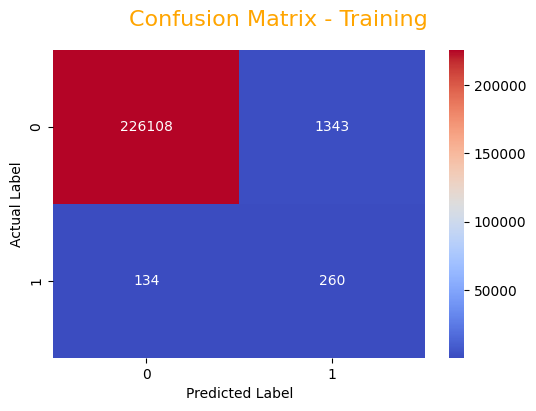

Accuracy Score:

99.35%

F1 Score:

99.55%

------------Test Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.15      0.63      0.24        98

    accuracy                           0.99     56962
   macro avg       0.57      0.81      0.62     56962
weighted avg       1.00      0.99      1.00     56962





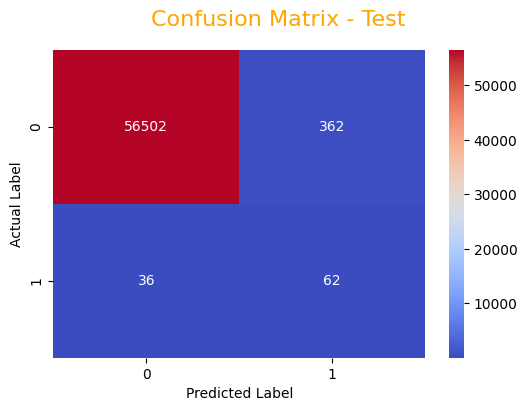

Accuracy Score:

99.30%

F1 Score:

99.52%




Applying and evaluating models on Standard Scaled Dataset
Evaluating KNeighbors on Normal Dataset:
Splitting Datasets....
Successfully split!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.96      0.79      0.87       394

    accuracy                           1.00    227845
   macro avg       0.98      0.89      0.93    227845
weighted avg       1.00      1.00      1.00    227845





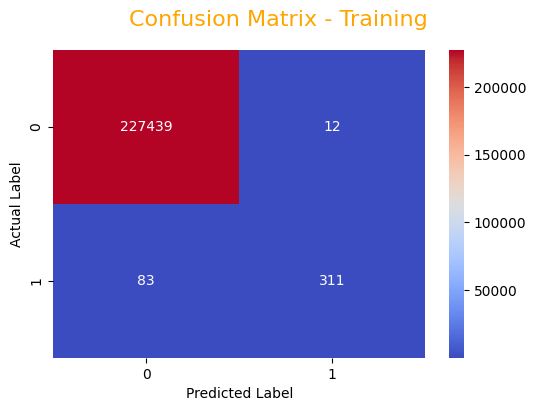

Accuracy Score:

99.96%

F1 Score:

99.96%

------------Test Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.78      0.85        98

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962





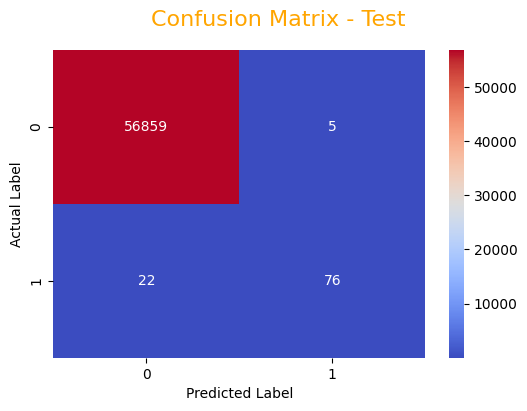

Accuracy Score:

99.95%

F1 Score:

99.95%




Evaluating XGBoost on Normal Dataset:
Splitting Datasets....
Successfully split!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845





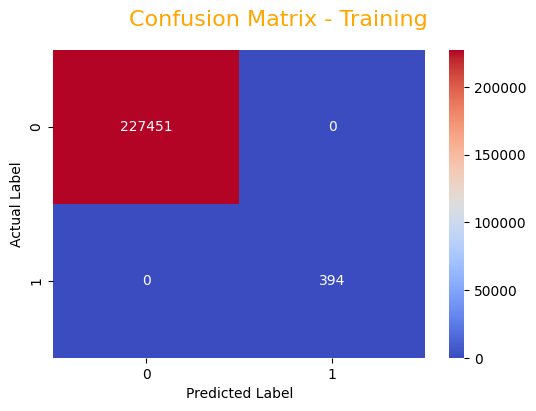

Accuracy Score:

100.00%

F1 Score:

100.00%

------------Test Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962





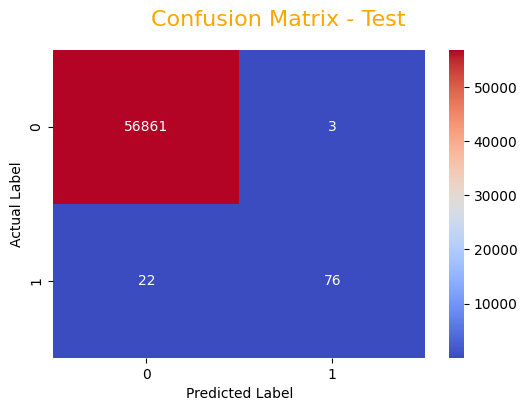

Accuracy Score:

99.96%

F1 Score:

99.95%




Evaluating DecisionTree on Normal Dataset:
Splitting Datasets....
Successfully split!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845





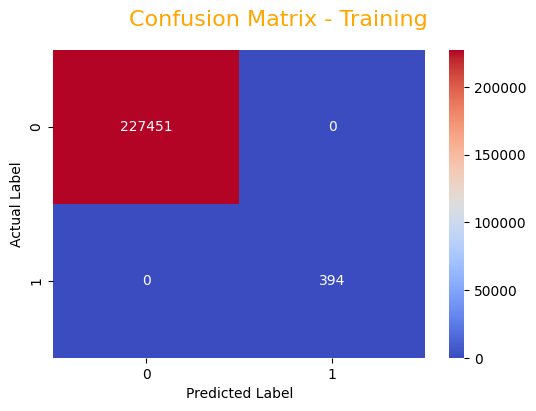

Accuracy Score:

100.00%

F1 Score:

100.00%

------------Test Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.81      0.76        98

    accuracy                           1.00     56962
   macro avg       0.86      0.90      0.88     56962
weighted avg       1.00      1.00      1.00     56962





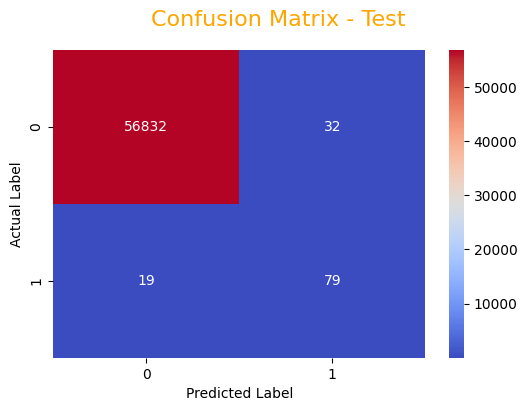

Accuracy Score:

99.91%

F1 Score:

99.91%




Evaluating RandomForest on Normal Dataset:
Splitting Datasets....
Successfully split!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845





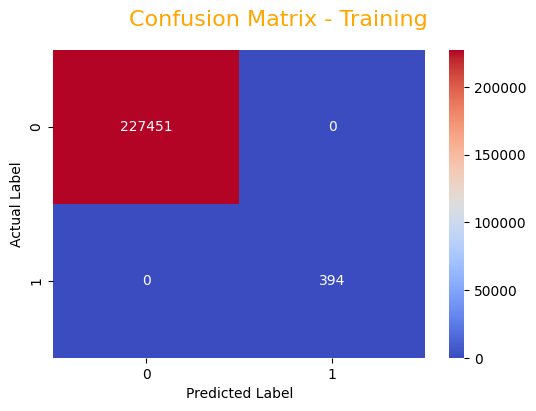

Accuracy Score:

100.00%

F1 Score:

100.00%

------------Test Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.78      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962





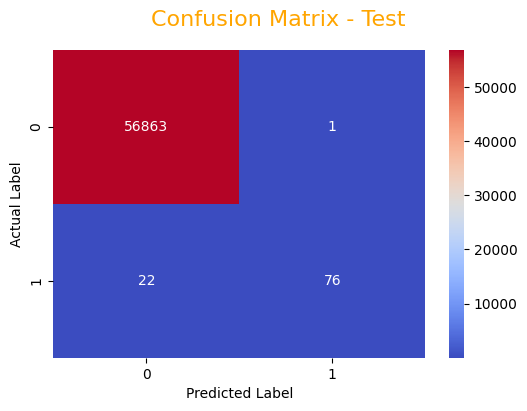

Accuracy Score:

99.96%

F1 Score:

99.96%




Evaluating LogisticRegression on Normal Dataset:
Splitting Datasets....
Successfully split!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.89      0.63      0.74       394

    accuracy                           1.00    227845
   macro avg       0.94      0.81      0.87    227845
weighted avg       1.00      1.00      1.00    227845





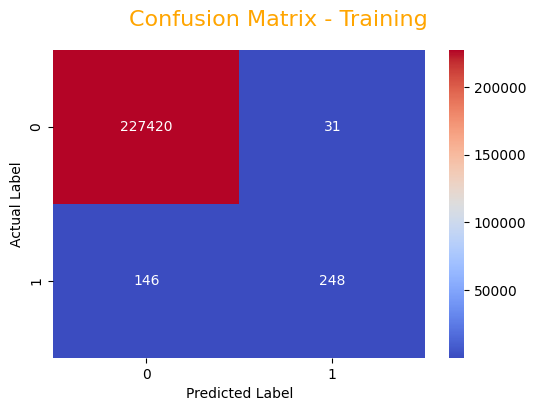

Accuracy Score:

99.92%

F1 Score:

99.92%

------------Test Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962





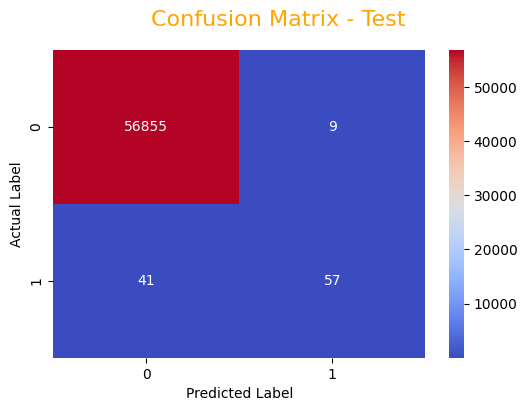

Accuracy Score:

99.91%

F1 Score:

99.90%




Evaluating NaiveBayes on Normal Dataset:
Splitting Datasets....
Successfully split!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    227451
           1       0.06      0.83      0.12       394

    accuracy                           0.98    227845
   macro avg       0.53      0.91      0.55    227845
weighted avg       1.00      0.98      0.99    227845





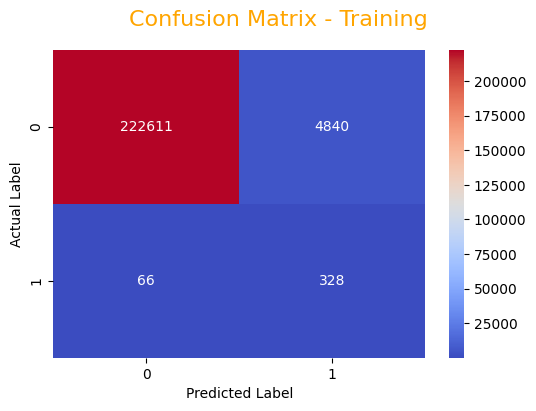

Accuracy Score:

97.85%

F1 Score:

98.76%

------------Test Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.82      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.90      0.55     56962
weighted avg       1.00      0.98      0.99     56962





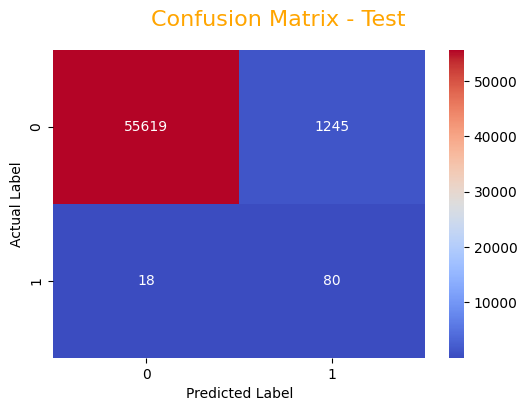

Accuracy Score:

97.78%

F1 Score:

98.73%




Applying and evaluating models on Undersampled Dataset
Evaluating KNeighbors on Normal Dataset:
Splitting Datasets....
Successfully split!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       393
           1       0.77      0.74      0.75       394

    accuracy                           0.75       787
   macro avg       0.76      0.75      0.75       787
weighted avg       0.76      0.75      0.75       787





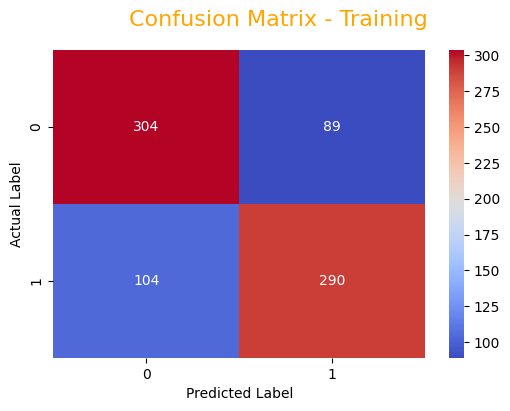

Accuracy Score:

75.48%

F1 Score:

75.47%

------------Test Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       0.65      0.68      0.66        99
           1       0.66      0.63      0.65        98

    accuracy                           0.65       197
   macro avg       0.66      0.65      0.65       197
weighted avg       0.66      0.65      0.65       197





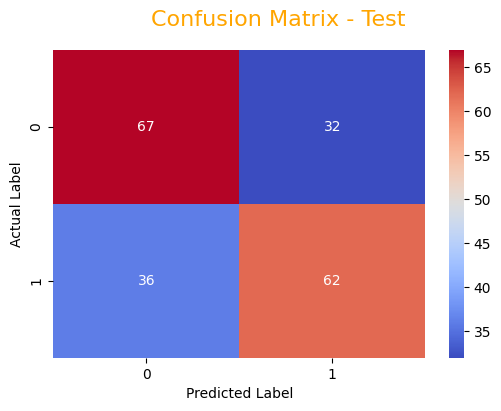

Accuracy Score:

65.48%

F1 Score:

65.46%




Evaluating XGBoost on Normal Dataset:
Splitting Datasets....
Successfully split!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       393
           1       1.00      1.00      1.00       394

    accuracy                           1.00       787
   macro avg       1.00      1.00      1.00       787
weighted avg       1.00      1.00      1.00       787





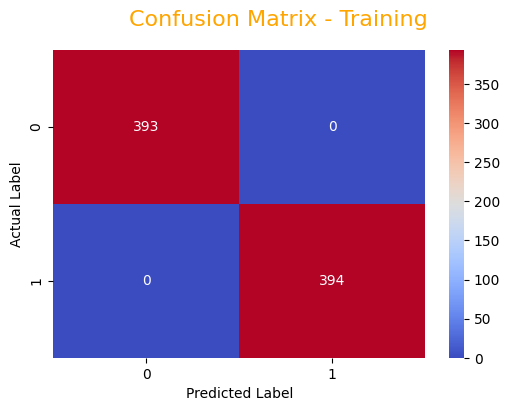

Accuracy Score:

100.00%

F1 Score:

100.00%

------------Test Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.96      0.94        99
           1       0.96      0.91      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197





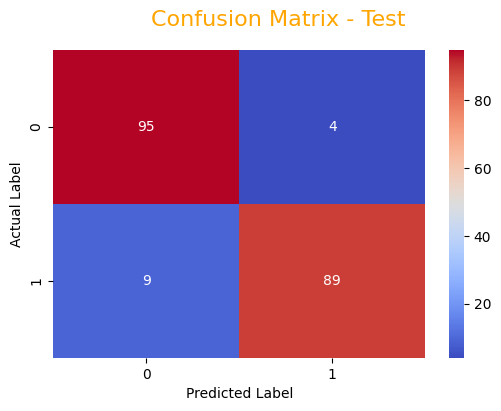

Accuracy Score:

93.40%

F1 Score:

93.40%




Evaluating DecisionTree on Normal Dataset:
Splitting Datasets....
Successfully split!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       393
           1       1.00      1.00      1.00       394

    accuracy                           1.00       787
   macro avg       1.00      1.00      1.00       787
weighted avg       1.00      1.00      1.00       787





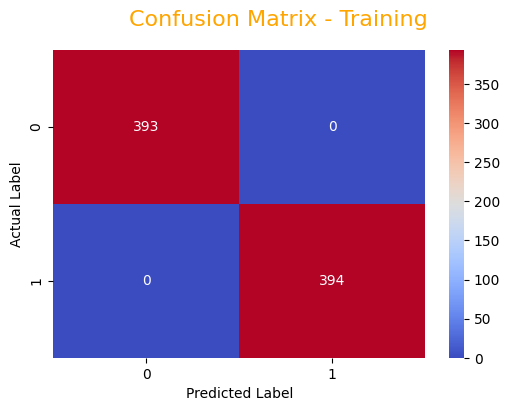

Accuracy Score:

100.00%

F1 Score:

100.00%

------------Test Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        99
           1       0.90      0.87      0.89        98

    accuracy                           0.89       197
   macro avg       0.89      0.89      0.89       197
weighted avg       0.89      0.89      0.89       197





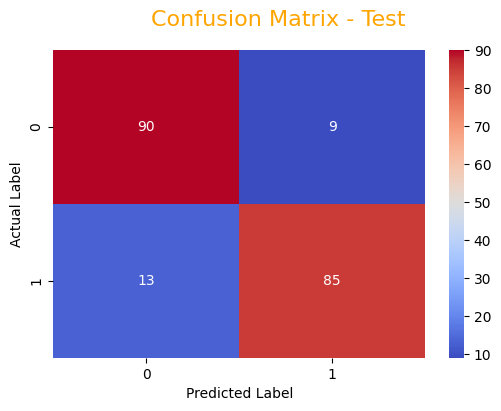

Accuracy Score:

88.83%

F1 Score:

88.83%




Evaluating RandomForest on Normal Dataset:
Splitting Datasets....
Successfully split!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       393
           1       1.00      1.00      1.00       394

    accuracy                           1.00       787
   macro avg       1.00      1.00      1.00       787
weighted avg       1.00      1.00      1.00       787





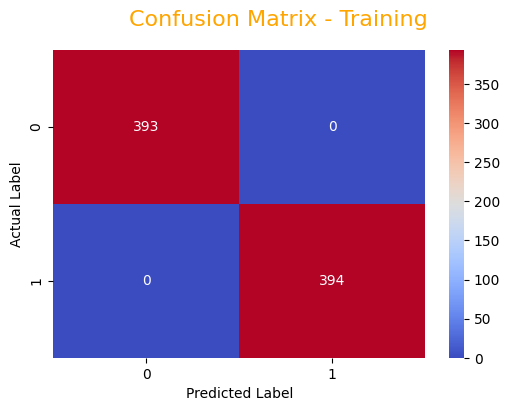

Accuracy Score:

100.00%

F1 Score:

100.00%

------------Test Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        99
           1       0.95      0.89      0.92        98

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197





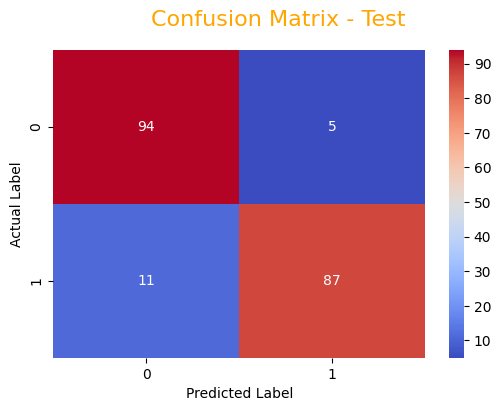

Accuracy Score:

91.88%

F1 Score:

91.87%




Evaluating LogisticRegression on Normal Dataset:
Splitting Datasets....
Successfully split!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       393
           1       0.99      0.93      0.96       394

    accuracy                           0.96       787
   macro avg       0.96      0.96      0.96       787
weighted avg       0.96      0.96      0.96       787





C:\Users\BHAVYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


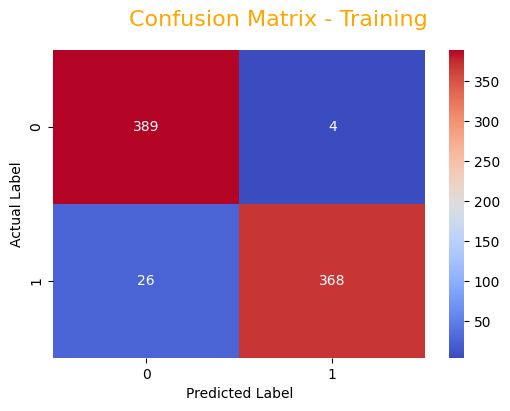

Accuracy Score:

96.19%

F1 Score:

96.19%

------------Test Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        99
           1       0.97      0.90      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197





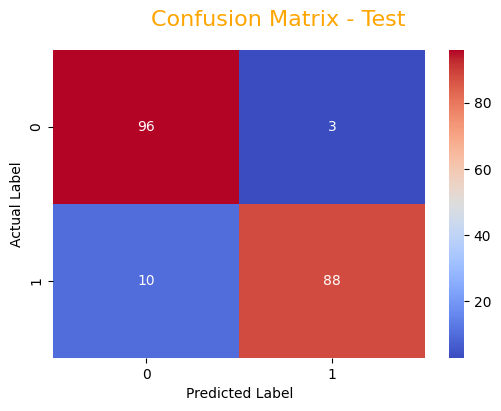

Accuracy Score:

93.40%

F1 Score:

93.39%




Evaluating NaiveBayes on Normal Dataset:
Splitting Datasets....
Successfully split!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.99      0.89       393
           1       0.99      0.75      0.86       394

    accuracy                           0.87       787
   macro avg       0.90      0.87      0.87       787
weighted avg       0.90      0.87      0.87       787





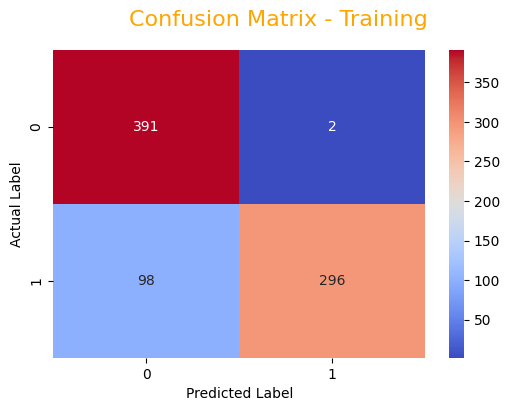

Accuracy Score:

87.29%

F1 Score:

87.10%

------------Test Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.99      0.88        99
           1       0.99      0.72      0.84        98

    accuracy                           0.86       197
   macro avg       0.89      0.86      0.86       197
weighted avg       0.88      0.86      0.86       197





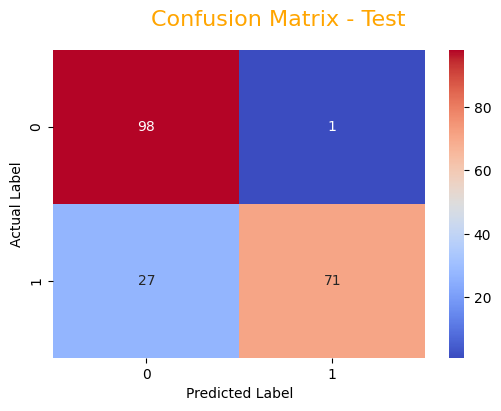

Accuracy Score:

85.79%

F1 Score:

85.52%




Applying and evaluating models on Oversampled Dataset
Evaluating KNeighbors on Normal Dataset:
Splitting Datasets....
Successfully split!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227565
           1       1.00      1.00      1.00    227339

    accuracy                           1.00    454904
   macro avg       1.00      1.00      1.00    454904
weighted avg       1.00      1.00      1.00    454904





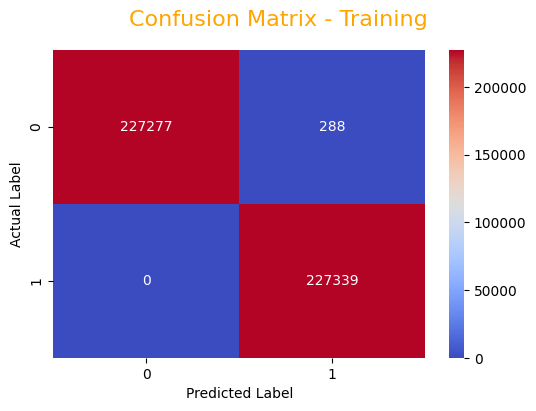

Accuracy Score:

99.94%

F1 Score:

99.94%

------------Test Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726





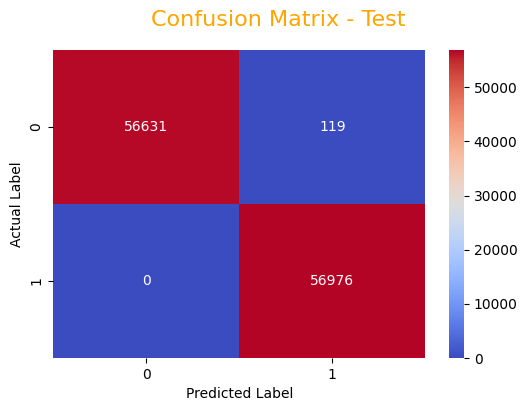

Accuracy Score:

99.90%

F1 Score:

99.90%




Evaluating XGBoost on Normal Dataset:
Splitting Datasets....
Successfully split!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227565
           1       1.00      1.00      1.00    227339

    accuracy                           1.00    454904
   macro avg       1.00      1.00      1.00    454904
weighted avg       1.00      1.00      1.00    454904





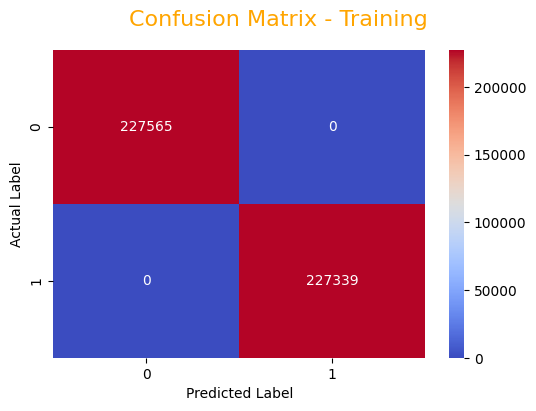

Accuracy Score:

100.00%

F1 Score:

100.00%

------------Test Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726





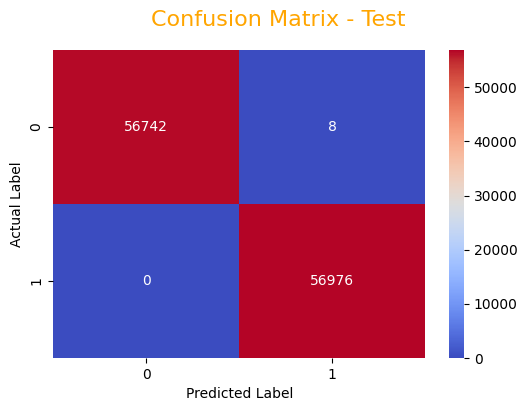

Accuracy Score:

99.99%

F1 Score:

99.99%




Evaluating DecisionTree on Normal Dataset:
Splitting Datasets....
Successfully split!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227565
           1       1.00      1.00      1.00    227339

    accuracy                           1.00    454904
   macro avg       1.00      1.00      1.00    454904
weighted avg       1.00      1.00      1.00    454904





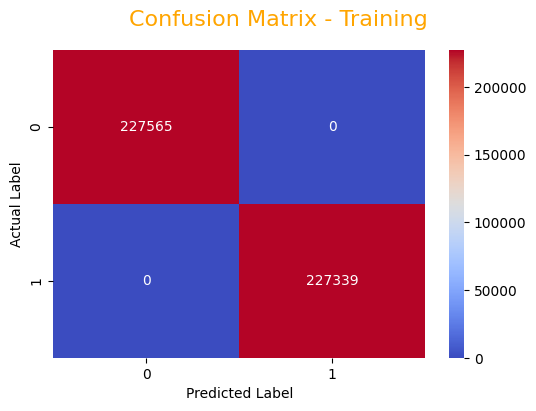

Accuracy Score:

100.00%

F1 Score:

100.00%

------------Test Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726





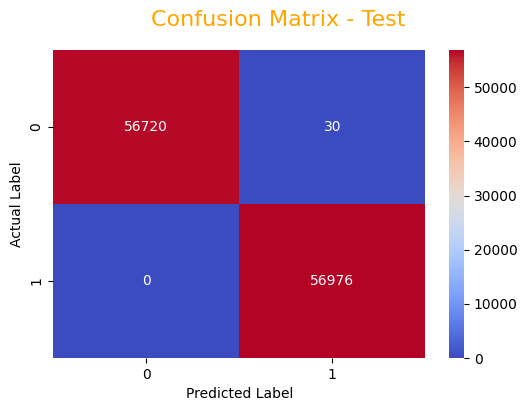

Accuracy Score:

99.97%

F1 Score:

99.97%




Evaluating RandomForest on Normal Dataset:
Splitting Datasets....
Successfully split!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227565
           1       1.00      1.00      1.00    227339

    accuracy                           1.00    454904
   macro avg       1.00      1.00      1.00    454904
weighted avg       1.00      1.00      1.00    454904





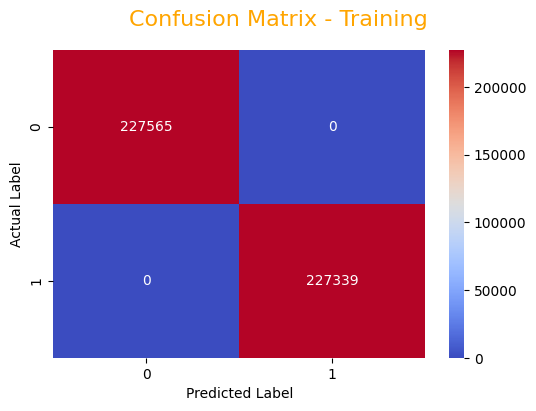

Accuracy Score:

100.00%

F1 Score:

100.00%

------------Test Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726





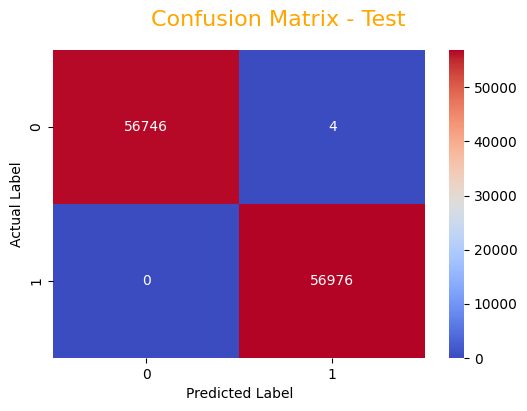

Accuracy Score:

100.00%

F1 Score:

100.00%




Evaluating LogisticRegression on Normal Dataset:
Splitting Datasets....
Successfully split!!!
Model Fitting.....


C:\Users\BHAVYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Successfully model fitted!!!
------------Training Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.98      0.95    227565
           1       0.98      0.92      0.95    227339

    accuracy                           0.95    454904
   macro avg       0.95      0.95      0.95    454904
weighted avg       0.95      0.95      0.95    454904





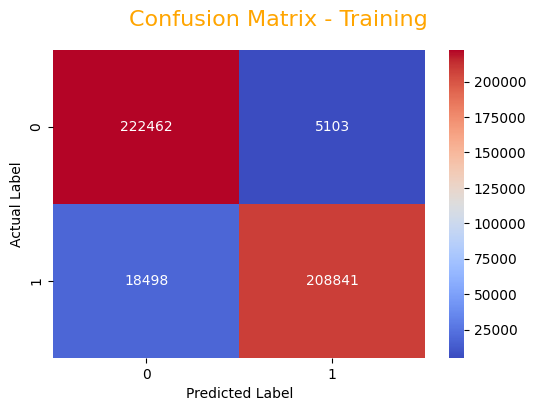

Accuracy Score:

94.81%

F1 Score:

94.81%

------------Test Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     56750
           1       0.98      0.92      0.95     56976

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726





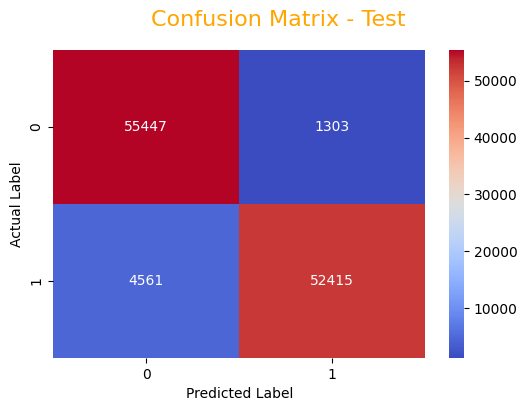

Accuracy Score:

94.84%

F1 Score:

94.84%




Evaluating NaiveBayes on Normal Dataset:
Splitting Datasets....
Successfully split!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.99      0.88    227565
           1       0.99      0.74      0.85    227339

    accuracy                           0.87    454904
   macro avg       0.89      0.87      0.86    454904
weighted avg       0.89      0.87      0.86    454904





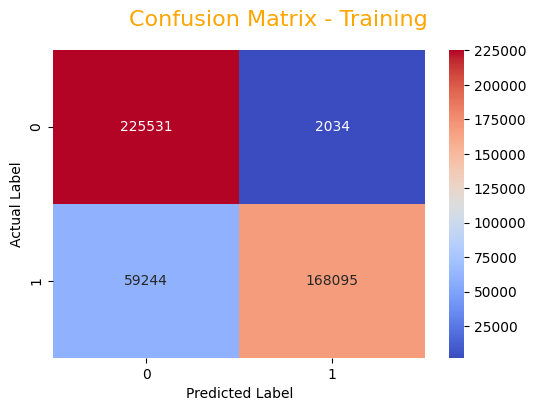

Accuracy Score:

86.53%

F1 Score:

86.31%

------------Test Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.99      0.88     56750
           1       0.99      0.74      0.85     56976

    accuracy                           0.87    113726
   macro avg       0.89      0.87      0.86    113726
weighted avg       0.89      0.87      0.86    113726





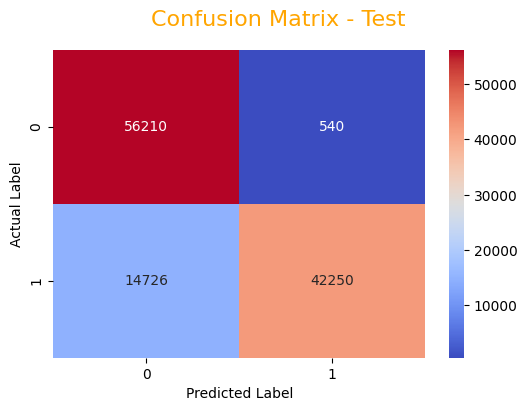

Accuracy Score:

86.58%

F1 Score:

86.37%




Applying and evaluating models on SMOTE Dataset
Evaluating KNeighbors on Normal Dataset:
Splitting Datasets....
Successfully split!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.96      0.98    227565
           1       0.97      0.99      0.98    227339

    accuracy                           0.98    454904
   macro avg       0.98      0.98      0.98    454904
weighted avg       0.98      0.98      0.98    454904





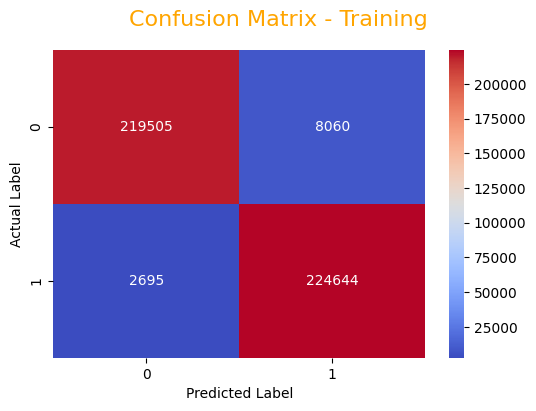

Accuracy Score:

97.64%

F1 Score:

97.64%

------------Test Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.95      0.96     56750
           1       0.95      0.98      0.96     56976

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726





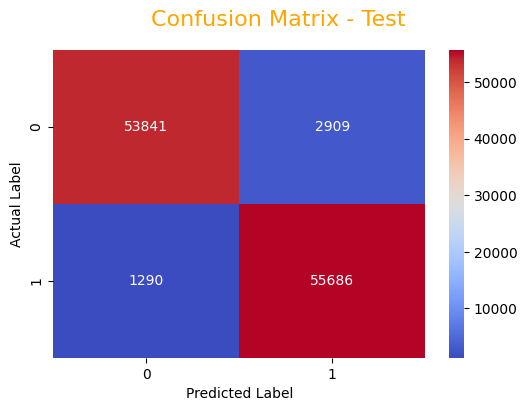

Accuracy Score:

96.31%

F1 Score:

96.31%




Evaluating XGBoost on Normal Dataset:
Splitting Datasets....
Successfully split!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227565
           1       1.00      1.00      1.00    227339

    accuracy                           1.00    454904
   macro avg       1.00      1.00      1.00    454904
weighted avg       1.00      1.00      1.00    454904





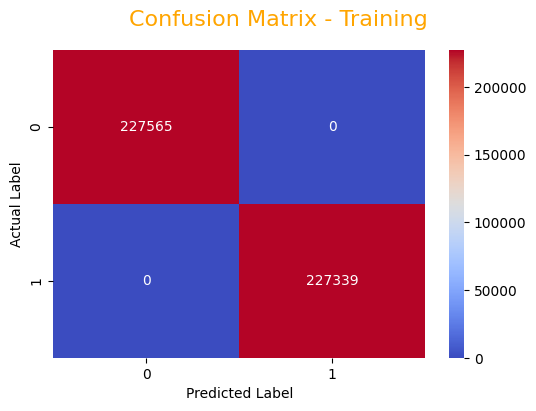

Accuracy Score:

100.00%

F1 Score:

100.00%

------------Test Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726





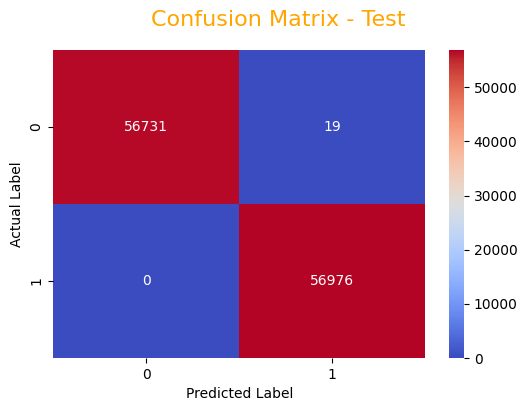

Accuracy Score:

99.98%

F1 Score:

99.98%




Evaluating DecisionTree on Normal Dataset:
Splitting Datasets....
Successfully split!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227565
           1       1.00      1.00      1.00    227339

    accuracy                           1.00    454904
   macro avg       1.00      1.00      1.00    454904
weighted avg       1.00      1.00      1.00    454904





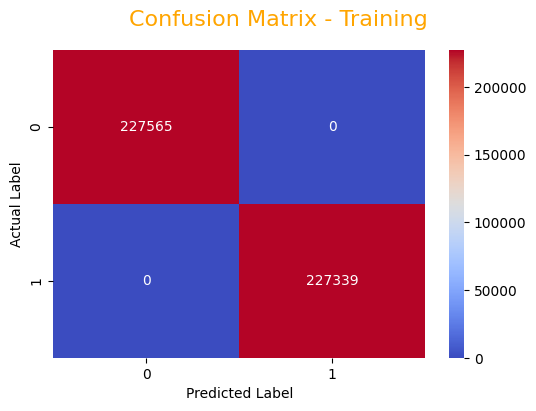

Accuracy Score:

100.00%

F1 Score:

100.00%

------------Test Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726





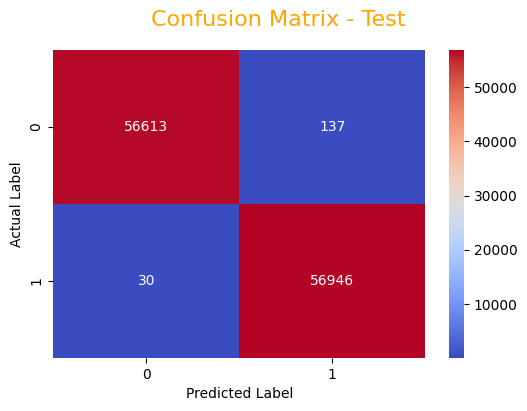

Accuracy Score:

99.85%

F1 Score:

99.85%




Evaluating RandomForest on Normal Dataset:
Splitting Datasets....
Successfully split!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227565
           1       1.00      1.00      1.00    227339

    accuracy                           1.00    454904
   macro avg       1.00      1.00      1.00    454904
weighted avg       1.00      1.00      1.00    454904





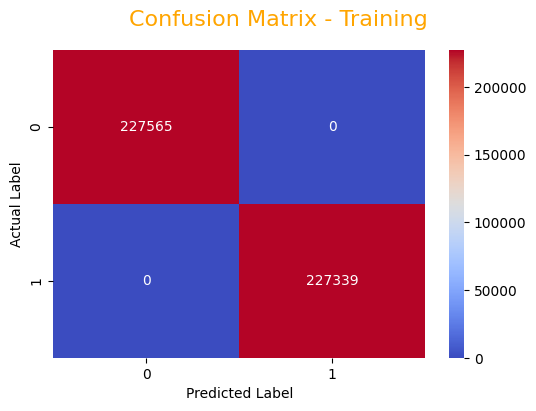

Accuracy Score:

100.00%

F1 Score:

100.00%

------------Test Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726





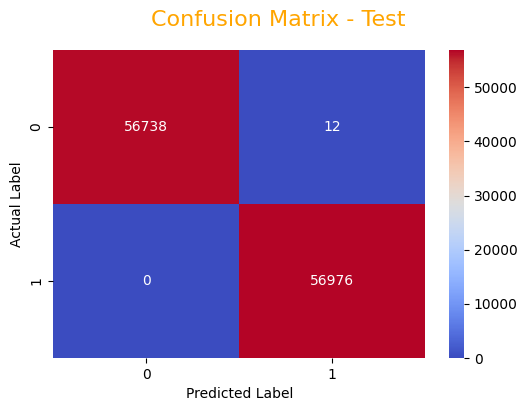

Accuracy Score:

99.99%

F1 Score:

99.99%




Evaluating LogisticRegression on Normal Dataset:
Splitting Datasets....
Successfully split!!!
Model Fitting.....


C:\Users\BHAVYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Successfully model fitted!!!
------------Training Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    227565
           1       0.99      0.97      0.98    227339

    accuracy                           0.98    454904
   macro avg       0.98      0.98      0.98    454904
weighted avg       0.98      0.98      0.98    454904





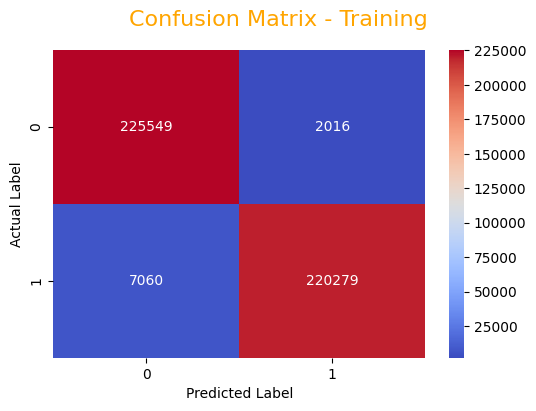

Accuracy Score:

98.00%

F1 Score:

98.00%

------------Test Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     56750
           1       0.99      0.97      0.98     56976

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726





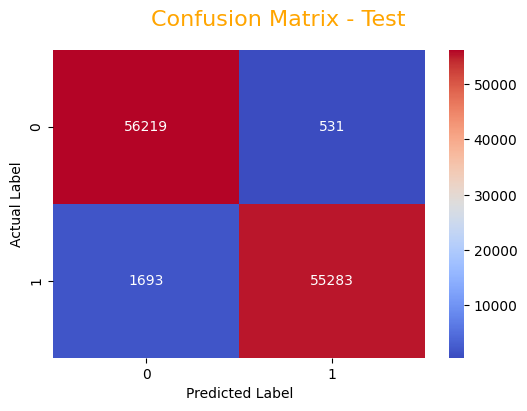

Accuracy Score:

98.04%

F1 Score:

98.04%




Evaluating NaiveBayes on Normal Dataset:
Splitting Datasets....
Successfully split!!!
Model Fitting.....
Successfully model fitted!!!
------------Training Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.99      0.88    227565
           1       0.99      0.74      0.85    227339

    accuracy                           0.87    454904
   macro avg       0.89      0.87      0.87    454904
weighted avg       0.89      0.87      0.87    454904





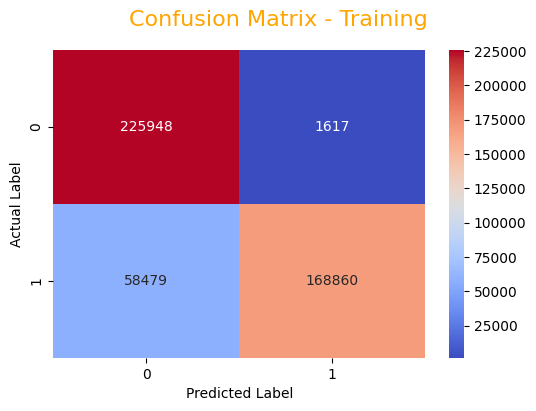

Accuracy Score:

86.79%

F1 Score:

86.58%

------------Test Prediction--------------
Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.99      0.88     56750
           1       0.99      0.75      0.85     56976

    accuracy                           0.87    113726
   macro avg       0.89      0.87      0.87    113726
weighted avg       0.89      0.87      0.87    113726





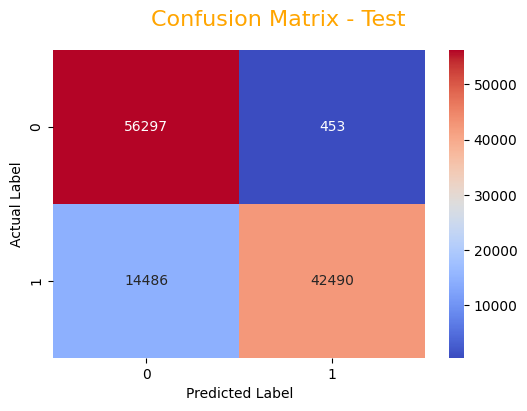

Accuracy Score:

86.86%

F1 Score:

86.66%






In [26]:
# Apply and evaluate models on various datasets
print("Applying and evaluating models on Normal Dataset")
normal_results = apply_all_models(X, y)

print("Applying and evaluating models on Standard Scaled Dataset")
scaled_results = apply_all_models(X_scaled, y)

print("Applying and evaluating models on Undersampled Dataset")
undersampled_results = apply_all_models(X_undersampled, y_undersampled)

print("Applying and evaluating models on Oversampled Dataset")
oversampled_results = apply_all_models(X_oversampled, y_oversampled)

print("Applying and evaluating models on SMOTE Dataset")
smote_results = apply_all_models(X_smote, y_smote)

In [27]:
# Function to compare results
def compare_results(results_dict):
    for dataset, results in results_dict.items():
        print(f"Results for {dataset} Dataset")
        for model_name, (train_acc, train_f1, test_acc, test_f1) in results.items():
            print(f"{model_name}: Train Accuracy: {train_acc:.2f}%, Train F1: {train_f1:.2f}%, Test Accuracy: {test_acc:.2f}%, Test F1: {test_f1:.2f}%")


In [28]:
# Compare all results
all_results = {
    "Normal": normal_results,
    "Standard Scaled": scaled_results,
    "Undersampled": undersampled_results,
    "Oversampled": oversampled_results,
    "SMOTE": smote_results
}

compare_results(all_results)

Results for Normal Dataset
KNeighbors: Train Accuracy: 99.85%, Train F1: 99.78%, Test Accuracy: 99.84%, Test F1: 99.76%
XGBoost: Train Accuracy: 100.00%, Train F1: 100.00%, Test Accuracy: 99.96%, Test F1: 99.95%
DecisionTree: Train Accuracy: 100.00%, Train F1: 100.00%, Test Accuracy: 99.92%, Test F1: 99.93%
RandomForest: Train Accuracy: 100.00%, Train F1: 100.00%, Test Accuracy: 99.96%, Test F1: 99.96%
LogisticRegression: Train Accuracy: 99.92%, Train F1: 99.92%, Test Accuracy: 99.91%, Test F1: 99.90%
NaiveBayes: Train Accuracy: 99.35%, Train F1: 99.55%, Test Accuracy: 99.30%, Test F1: 99.52%
Results for Standard Scaled Dataset
KNeighbors: Train Accuracy: 99.96%, Train F1: 99.96%, Test Accuracy: 99.95%, Test F1: 99.95%
XGBoost: Train Accuracy: 100.00%, Train F1: 100.00%, Test Accuracy: 99.96%, Test F1: 99.95%
DecisionTree: Train Accuracy: 100.00%, Train F1: 100.00%, Test Accuracy: 99.91%, Test F1: 99.91%
RandomForest: Train Accuracy: 100.00%, Train F1: 100.00%, Test Accuracy: 99.96%, T